<img src="http://www.ulb.ac.be/dre/com/docs/logo3lp.jpg" alt="ULB logo" width="20%" align="right" border="4"><br><br><br><br>

# Digital Laboratory

PHYS-F-314, Université Libre de Bruxelles


<p class="version">
G. de Lentdecker, J. A. Aguilar
</p>


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e
import SchemDraw.logic as l

### Power Suply Setup

The 74HC ICs will tolerate a power supply between 2 V and 6 V however 3.3 V and 5 V are common choices for real circuits today.  We will use 5 V through this laboratory. The laboratory power supplies are variable up to 30 V. We will use a linear 3-­‐terminal regulator, the 7805, which will produce 5 V output for an input of approximately 7 V or higher (it has a “dropout” voltage of 1.7 V as specified in the datasheet). 


### 555 Timer Setup

You are going to need to make your  own clock circuit to drive the sequential logic in the following portion of this laboratory. The Intersil ICL7555 will be the basis of your clock. Consult the  datasheets  for information on how to connect the external components to make a clock. You should use the “astable” alternate configuration with two external resistors and one external capacitor which produces a clock with a programmable duty cycle between 50 and 100%. Choose values of the resistance and capacitance to allow a clock  with  a  frequency between 10 and 20 kHz and a duty cycle between 80 and 90%. Measure  the clock with an oscilloscope and verify the frequency and duty cycle.

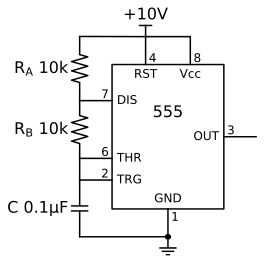

In [8]:
d = schem.Drawing(unit=2.3)

left = {'cnt':3,
        'labels':['TRG','THR','DIS'],
        'plabels':['2','6','7'],
        'loc':[.2,.35,.75],
        'lblsize':12,
        }
right = {'cnt':2,
         'labels':['OUT'],
         'plabels':['3'],
         'loc':[.5],
        'lblsize':12,
         }
top = {'cnt':2,
       'labels':['RST','Vcc'],
       'plabels':['4','8'],
       'loc':[.3,.7],
       'lblsize':12,
       }
bot = {'cnt':1,
       'labels':['GND'],
       'plabels':['1'],
       'lblsize':12,
        }

IC555 = e.blackbox(d.unit*1.5, d.unit*2.25, 
                   linputs=left, rinputs=right, tinputs=top, binputs=bot,
                   leadlen=1, mainlabel='555')
T = d.add(IC555)

BOT = d.add(e.GND, xy=T.GND)  # Note: Anchors named same as pin labels

d.add(e.DOT)
d.add(e.RES, endpts=[T.DIS, T.THR], label='$R_B$ 10k')

d.add(e.RES, d='up', xy=T.DIS, label='$R_A$ 10k')
d.add(e.LINE, to=T.RST)

d.add(e.LINE, endpts=[T.THR, T.TRG])
d.add(e.LINE, endpts=[T.Vcc, T.RST])
d.add(e.CAP, xy=T.TRG, d='down', toy=BOT.start, label='C 0.1$\mu F$', l=d.unit/2)
d.add(e.LINE, d='right', tox=BOT.start)
d.add(e.VDD, xy=T.RST, label="+10V")
d.draw()
d.save("555.eps")


### CMOS Inverter

Using a pair of MOSFETS we can create an inverter using the following circuit:

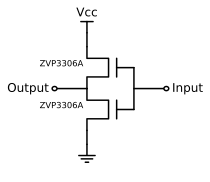

In [9]:
d = schem.Drawing(fontsize=12)
NFET1 = d.add(e.NFET, label=r"$\ ^{{ZVP3306A}}$")
NFET2 = d.add(e.NFET, label=r"$\ ^{{ZVP3306A}}$")
line1 = d.add(e.LINE, endpts=[NFET1.source, NFET2.drain])
line2 = d.add(e.LINE, endpts=[NFET1.gate, NFET2.gate])
d.add(e.LINE, xy=NFET1.drain, d='up', l=d.unit/6.)
d.add(e.VDD, label="Vcc")
d.add(e.LINE, xy=NFET2.source, d='down', l=d.unit/6.)

d.add(e.GND)
d.add(e.LINE, xy=line1.center, d="left", l=d.unit/3.)
d.add(e.DOT_OPEN, lftlabel="Output")
d.add(e.LINE, xy=line2.center, d="right", l=d.unit/3.)
d.add(e.DOT_OPEN, rgtlabel="Input")
""""d.add(e.VDD, label="Vcc")
p = d.add(e.LINE, xy=NFET2.source, d='down', l=d.unit/6.)
d.add(e.GND)
d.add(e.LINE, xy=p.)
d.add(e.LINE, xy=NFET1.gate)
"""
d.draw()
d.save("CMOS.eps")

**Figure 1.** CMOS inverter

<div class="question">
<p><b>ATTENTION:</b> Be sure to connect the source
(S) of the ZVP3306A to the positive rail and the drain (D) to the drain of the ZVN3306A. Connect the input of the completed inverter to the output of the timer to obtain a clock with duty cycle between 10 and 20%. Verify by examination of the output with an oscilloscope.
</p>
</div>

### 2-Bit Adder 

Implement the 2‐bit adder shown below. Use the 4-way DIP switches to encode the two 2-bit numbers. Use LEDs (with at least 100$\Omega$ in series to ground!) to indicate the 3-bit output (2-bit sum plus carry)

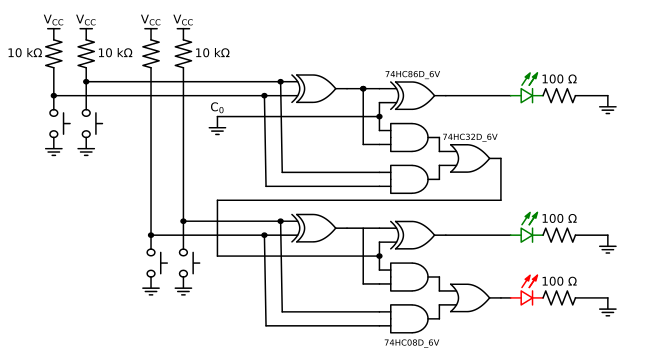

In [10]:
d = schem.Drawing(unit=1., fontsize=12)

## FIRST ADDER
S0 = d.add(l.XOR2, label="$ _{74HC86D\_6V}}$")
AoBC0 = d.add(l.AND2, xy=[S0.in1[0],S0.in1[1] - 1.5], anchor='in1')
c = d.add(e.LINE, endpts=[S0.in2,AoBC0.in1])
AB0 = d.add(l.AND2, d='right',  xy=[AoBC0.in1[0],AoBC0.in1[1] - 1.5], anchor='in1')
d.add(e.DOT, xy=c.center)
C0 = d.add(e.LINE, xy=c.center, d='left', l = d.unit*5)
d.add(e.GND, label="C$_0$")
X0 = d.add(e.LINE, xy = S0.in1, d='left', l= d.unit*1)
d.add(e.DOT, xy=X0.center)

XX0 = d.add(e.LINE, xy=AoBC0.in2, d='left', l=d.unit*0.5)
d.add(e.LINE, endpts=[X0.center,XX0.end])
AxB0 = d.add(l.XOR2, anchor="out", xy=[X0.end], d='right')

Y0 = d.add(e.LINE, xy=AB0.in1, d='left', l=d.unit*3)
Y2 = d.add(e.LINE, xy=AB0.in2, d='left', l=d.unit*3.5)

A0 = d.add(e.LINE, xy=AxB0.in1, d="left", l=d.unit*6.)
d.add(e.DOT, xy=A0.end)
d.add(e.LINE, d="up", l = d.unit*0.5)
d.add(e.RES, d="up",botlabel="10 k$\Omega$")
d.add(e.VDD, label="$V_{CC}$")

B0 = d.add(e.LINE, xy=AxB0.in2, d="left", l=d.unit*7.)
d.add(e.DOT, xy=B0.end)
d.add(e.LINE, d="up", l = d.unit*1)
d.add(e.RES, d="up", toplabel="10 k$\Omega$")
d.add(e.VDD, label="$V_{CC}$")
d.add(e.LINE, d="down", xy= B0.end, l = d.unit*0.5)

d.add(e.BUTTON)
d.add(e.GND)
d.add(e.LINE, d="down", xy= A0.end, l = d.unit*1)
d.add(e.BUTTON)
d.add(e.GND)

d.add(e.DOT, xy=A0.start)
d.add(e.LINE, endpts=[A0.start, Y0.end])
d.add(e.LINE, endpts=[[B0.start[0] - 0.5, B0.start[1]], Y2.end])
d.add(e.DOT, xy=[B0.start[0] - 0.5, B0.start[1]])

d.add(e.LINE, xy=S0.out, d='right', l=d.unit*2)
d.add(e.LED, color="green")
d.add(e.RES, label="100 $\Omega$")
d.add(e.LINE, l=d.unit*1)
d.add(e.GND)

SS0 = d.add(l.OR2, xy=[AoBC0.out[0],(AoBC0.out[1]+AB0.out[1])/2.], label="$_{74HC32D\_6V}$")
d.add(e.LINE, endpts=[AoBC0.out, SS0.in1])
d.add(e.LINE, endpts=[AB0.out, SS0.in2])

## SECOND ADDER
S1 = d.add(l.XOR2, anchor="in1", xy=[S0.in1[0],S0.in1[1]-5], d='right')
AoBC1 = d.add(l.AND2, xy=[S1.in1[0],S1.in1[1] - 1.5], anchor='in1')
c = d.add(e.LINE, endpts=[S1.in2,AoBC1.in1])
AB1 = d.add(l.AND2, d='right',  xy=[AoBC1.in1[0],AoBC1.in1[1] - 1.5], anchor='in1', lblofst=-0.2, botlabel="$^{74HC08D\_6V}$")
d.add(e.DOT, xy=c.center)
d.add(e.LINE, xy=c.center, d='left', l = d.unit*5)
d.add(e.LINE, d='up', l=d.unit*2)
C1 = d.add(e.LINE, d="right", l=d.unit*8.75)
d.add(e.LINE, endpts=[C1.end, SS0.out])
X1 = d.add(e.LINE, xy = S1.in1, d='left', l= d.unit*1)
d.add(e.DOT, xy=X0.center)

XX1 = d.add(e.LINE, xy=AoBC1.in2, d='left', l=d.unit*0.5)
d.add(e.LINE, endpts=[X1.center,XX1.end])
AxB1 = d.add(l.XOR2, anchor="out", xy=[X1.end], d='right')

YY0 = d.add(e.LINE, xy=AB1.in1, d='left', l=d.unit*3)
YY2 = d.add(e.LINE, xy=AB1.in2, d='left', l=d.unit*3.5)

A1 = d.add(e.LINE, xy=AxB1.in1, d="left", l=d.unit*3.)
d.add(e.DOT, xy=A1.end)
d.add(e.LINE, d="up", l = d.unit*5.5)
d.add(e.RES, d="up",botlabel="10 k$\Omega$")
d.add(e.VDD, label="$V_{CC}$")

B1 = d.add(e.LINE, xy=AxB1.in2, d="left", l=d.unit*4.)
d.add(e.DOT, xy=B1.end)
d.add(e.LINE, d="up", l = d.unit*6)
d.add(e.RES, d="up")
d.add(e.VDD, label="$V_{CC}$")
d.add(e.LINE, d="down", xy= B1.end, l = d.unit*0.5)

d.add(e.BUTTON)
d.add(e.GND)
d.add(e.LINE, d="down", xy= A1.end, l = d.unit*1)
d.add(e.BUTTON)
d.add(e.GND)

d.add(e.DOT, xy=A1.start)
d.add(e.LINE, endpts=[A1.start, YY0.end])
d.add(e.LINE, endpts=[[B1.start[0] - 0.5, B1.start[1]], YY2.end])
d.add(e.DOT, xy=[B1.start[0] - 0.5, B1.start[1]])

d.add(e.LINE, xy=S1.out, d='right', l=d.unit*2)
d.add(e.LED, color="green")
d.add(e.RES, label="100 $\Omega$")
d.add(e.LINE, l=d.unit*1)
d.add(e.GND)

SS1 = d.add(l.OR2, xy=[AoBC1.out[0],(AoBC1.out[1]+AB1.out[1])/2.])
d.add(e.LINE, endpts=[AoBC1.out, SS1.in1])
d.add(e.LINE, endpts=[AB1.out, SS1.in2])
d.add(e.LINE, xy=SS1.out, d='right', l=d.unit*0.3)
d.add(e.LED, color="red")
d.add(e.RES, d='right', label="100 $\Omega$")
d.add(e.LINE, l=d.unit*1)
d.add(e.GND)


d.draw()
d.save("adder.eps")


**Figure 2.** 2-bit full adder with carry out. You will need 1 74HC86, 1 74HC00, 1 74HC02, and 1 74HC04
to implement the gates (AND and OR are formed from NAND and NOR with inverter followers)


<div class="question">
<p><b>ATTENTION:</b> when using the multiple‐gate ’00 and ’02 be sure to connect either to ground or to Vcc all unused inputs -otherwise you will observe very strange behavior. Using the DIP switch step through all possible combinations of two‐bit inputs (16 combinations in total) and verify that the circuit adds the numbers correctly.
</p>
</div>

### SR Flip-Flop (Debouncer)

Connect two NAND or two NOR gates (1/2 x 74HC00 or 74HC02 – remember to not leave floating the unused inputs!!) in the SR flip-flop configuration.  Add 2 pull‐down resistors to the inputs 1A and 2A and connect 1Y to 2B and 2Y to 1A. Observe what happens when you ‘pull‐up’ the inputs to the +5V rail by shorting a small length of connect wire to the +5V rail. Does this circuit correctly implement the truth table of the SR flip‐flop? As in the last exercise use LEDs with > 100 Ω in series to ground to indicate the output state, <font color="red">red</font> for the $Q$ and <font color="green">green</font> for the $\overline{Q}$ output.

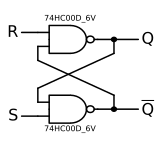

In [11]:
d = schem.Drawing()
# Two front gates (SR latch)
G1 = d.add(l.NAND2, anchor='in1', toplabel="$ _{_{74HC00D\_6V}}$", lblofst=-0.4)
d.add(e.LINE, l=d.unit/6)
Q1 = d.add(e.DOT)

d.add(e.LINE, l=d.unit/4, rgtlabel='$Q$')

G2 = d.add(l.NAND2, anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5], botlabel="$ ^{^{74HC00D\_6V}}$", lblofst=-0.3)
d.add(e.LINE, l=d.unit/6)
Qb = d.add(e.DOT)
d.add(e.LINE, l=d.unit/4, rgtlabel='$\overline{Q}$')

S1 = d.add(e.LINE, xy=G2.in1, d='up', l=d.unit/6)

d.add(e.LINE, d='down', xy=Q1.start, l=d.unit/6)

d.add(e.LINE, to=S1.end)

R1 = d.add(e.LINE, xy=G1.in2, d='down', l=d.unit/6)
d.add(e.LINE, d='up', xy=Qb.start, l=d.unit/6)
d.add(e.LINE, to=R1.end)

d.add(e.LINE, xy=G1.in1, d="left", l=d.unit/6, lftlabel='$R$')
d.add(e.LINE, xy=G2.in2, d="left", l=d.unit/6, lftlabel='$S$')

d.draw()
d.save("SR.eps")

### 4-bit ripple counter

Implement the 4‐bit ripple counter shown in Figure 4, again taking care to ensure that all inputs are properly connected and not left floating. Note that we do not have 74HC112D Flip-Flops which are dual positive edge‐triggered devices and which additionally have the K input inverted – it’s a JK’ flip‐flop so please pay close attention to the [data sheet](https://assets.nexperia.com/documents/data-sheet/74HC_HCT109.pdf).

Using LEDs (yep, with 100 $\Omega$ or greater series resistors), setup an indicator for the output “count” currently being counted in the arrangement of registers.

Using an oscilloscope, note the propagation delays between the various outputs.  What is the maximum speed at which you could  clock such a circuit?


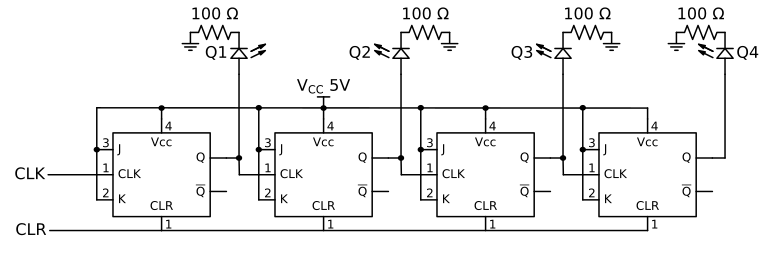

In [12]:
d = schem.Drawing(unit=3)

left = {'cnt':3,
        'labels':['K','CLK','J'],
        'plabels':['2','1','3'],
        'loc':[.2,.5,.8],
        'lblsize':12,
        }
right = {'cnt':2,
         'labels':['$\overline{Q}$','Q'],
         'plabels':['5, 6'],
         'loc':[.3,.7],
        'lblsize':12,
         }
top = {'cnt':1,
       'labels':['Vcc'],
       'plabels':['4'],
       'loc':[.5],
       'lblsize':12,
       }
bot = {'cnt':1,
       'labels':['CLR'],
       'plabels':['1'],
       'lblsize':12,
        }

B = e.blackbox(d.unit, d.unit, linputs=left, binputs=bot, tinputs=top, rinputs=right)
JK = d.add(B, anchor="J")
JK1 = d.add(B, anchor="J", xy=[JK.J[0] + 5,JK.J[1]])
JK2 = d.add(B, anchor="J", xy=[JK1.J[0] + 5,JK.J[1]])
JK3 = d.add(B, anchor="J", xy=[JK2.J[0] + 5,JK.J[1]])
CLK = d.add(e.LINE, xy=JK.CLK, d="left", l=d.unit*0.5, lftlabel="CLK")
Q = d.add(e.LINE, xy=JK.Q, d="right", l=d.unit*0.13)
d.add(e.LINE,endpts=[JK.K,JK.J])
d.add(e.DOT)
V1 = d.add(e.LINE,d='up',l=d.unit*0.5)


d.add(e.LINE,endpts=[JK1.K,JK1.J])
d.add(e.DOT)
d.add(e.LINE,d='up',l=d.unit*0.5)
d.add(e.DOT)

d.add(e.LINE, d="up", xy=JK.Vcc, l=d.unit*0.13)
d.add(e.DOT)

CLK1 = d.add(e.LINE, xy=JK1.CLK, d="left", l=d.unit*0.2)
Q1 = d.add(e.LINE, xy=JK1.Q, d="right", l=d.unit*0.13)
d.add(e.LINE, endpts=[CLK1.end,Q.end])
d.add(e.DOT)
d.add(e.LINE, d='up', l=d.unit*1)
d.add(e.LED, d='up', flip=True, l=d.unit*0.5, label="Q1")

d.add(e.RES, d='left', label="100 $\Omega$", l=d.unit*0.5)

d.add(e.GND)

#d.add(e.DOT_OPEN, label="Q1")
d.add(e.LINE, xy=JK1.Vcc, d='up', l=d.unit*0.13)
d.add(e.DOT)
d.add(e.VDD, label="$V_{CC}$ 5V")


d.add(e.LINE,endpts=[JK2.K,JK2.J])
d.add(e.DOT)
d.add(e.LINE,d='up',l=d.unit*0.5)
d.add(e.DOT)
CLK2 = d.add(e.LINE, xy=JK2.CLK, d="left", l=d.unit*0.2)
Q2 = d.add(e.LINE, xy=JK2.Q, d="right", l=d.unit*0.13)
d.add(e.LINE, endpts=[CLK2.end,Q1.end])
d.add(e.DOT)
d.add(e.LINE, d='up', l=d.unit*1)
d.add(e.LED, d='up', l=d.unit*0.5, label="Q2")

d.add(e.RES, d='right', label="100 $\Omega$", l=d.unit*0.5)

d.add(e.GND)
#d.add(e.LINE, l=d.unit*1)

#d.add(e.DOT_OPEN, label="Q2")
d.add(e.LINE, xy=JK2.Vcc,d='up', l=d.unit*0.13)
d.add(e.DOT)

d.add(e.LINE,endpts=[JK3.K,JK3.J])
d.add(e.DOT)
d.add(e.LINE,d='up',l=d.unit*0.5)
d.add(e.DOT)
CLK3 = d.add(e.LINE, xy=JK3.CLK, d="left", l=d.unit*0.2)
Q3 = d.add(e.LINE, xy=JK3.Q, d="right", l=d.unit*0.13)
d.add(e.LINE, xy=Q3.end, d='up', l=d.unit*1)
d.add(e.LED, d='up', l=d.unit*0.5, botlabel="Q4")
d.add(e.RES, d="left", label="100 $\Omega$", l=d.unit*0.5)
#d.add(e.LINE, l=d.unit*1)
d.add(e.GND)

#d.add(e.DOT_OPEN, label="Q4")
d.add(e.LINE, endpts=[CLK3.end,Q2.end])
d.add(e.DOT)
d.add(e.LINE, d='up', l=d.unit*1)
d.add(e.LED, d='up', l=d.unit*0.5, label="Q3")

d.add(e.RES, d="right", label="100 $\Omega$", l=d.unit*0.5)

d.add(e.GND)
#d.add(e.DOT_OPEN, label="Q3")
V4 = d.add(e.LINE, xy=JK3.Vcc, d='up',l=d.unit*0.13)

VCC = d.add(e.LINE, endpts= [V1.end, V4.end])
Clk = d.add(e.LINE, endpts= [JK.CLR, JK3.CLR])

d.add(e.LINE, xy=JK.CLR, d = "left", l=d.unit*1.15, lftlabel="CLR")
d.draw()
d.save("counter.eps")

**Figure 4** Ripple counter (4-bit) implemented using JK flip-flops

----
<p class="version">Revision <a href="mailto:juaguila@ulb.ac.be">J.A. Aguilar</a> 2018 </p>
<p class="version">Kyle Hanson 2010 </p>